## Performing EDA on zomato dataset

In [1]:
# # if packages aren't installed then run this line
# !pip install opencv-python
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn

### EDA processes
1. Missing values
2. Explore about numerical values
3. Explore about categorical values
4. Finding relationship between features

In [2]:
# importing all requirements
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# path of the dataset
PATH = r'/Users/pan/desktop/data-science/eda/zomato/zomatodataset/'

In [3]:
## convert the dataset from "json" to "csv"


In [4]:
# now read the dataset zomato.csv
df = pd.read_csv(PATH + 'zomato.csv', encoding='latin-1')
df.shape

(9551, 21)

In [5]:
# displaying the data
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [6]:
# list of columns
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
# whole information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
# calculate all the mathematical functions on numeric data(only works on numeric data)
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
# finding null values 
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
# finding list of all columns having null values
[features for features in df.columns if df[features].isnull().sum() > 0]

['Cuisines']

<AxesSubplot:>

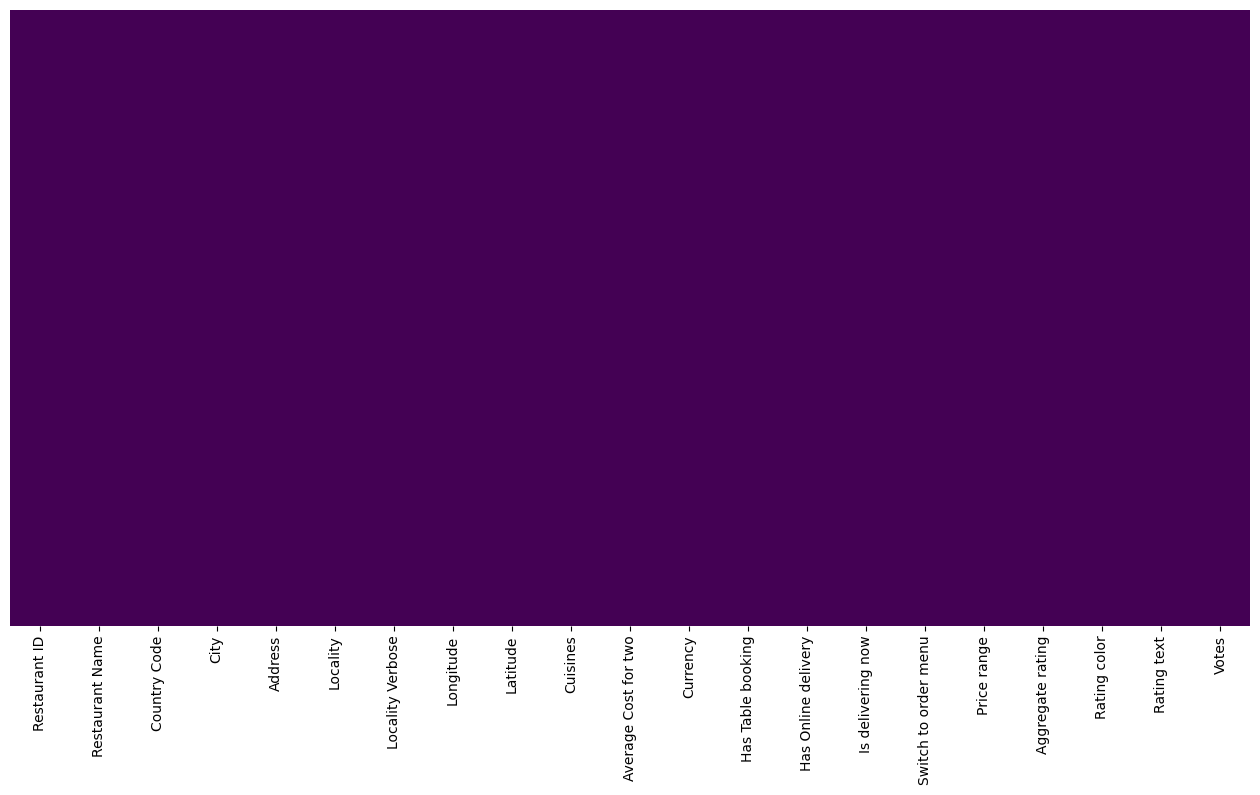

In [38]:
# Heatmaps are used to show relationships between two variables, 
# one plotted on each axis. By observing how cell colors change across each axis, 
# you can observe if there are any patterns in value for one or both variables.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
# there is an another dataset present there
df_country = pd.read_excel(PATH + 'Country-Code.xlsx')
df_country.shape

(15, 2)

In [13]:
# now compare both the dataset
print(df.columns)
df_country.head()

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [14]:
# now combine the both dataset df U df_country
final_df = pd.merge(df, df_country, on='Country Code', how='left')
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [15]:
# is there any null values in new column
[feat for feat in final_df.columns if final_df[feat].isnull().sum() > 0]

['Cuisines']

In [16]:
""" it shows that there are some countries that 
are dominating the whole dataset.
"""

# find the records on the basis of countries
final_df['Country'].value_counts()


India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

([<matplotlib.patches.Wedge at 0x7fab00803460>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.1693793723079982, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.024601879417366287, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.001447389837670764, 'Canada')])

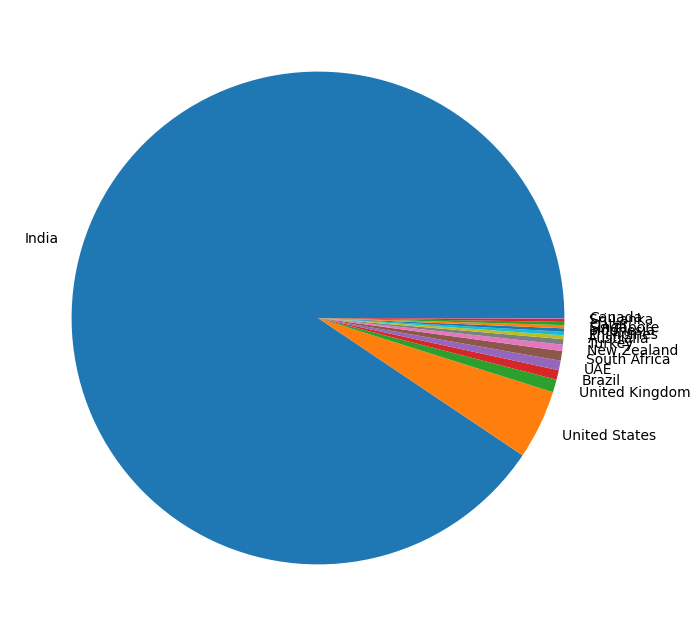

In [17]:
# plot the piechart to understand the marketplace of zomato
plt.subplots(figsize=(18, 8))
plt.pie(final_df['Country'].value_counts().values, labels=final_df['Country'].value_counts().index)

([<matplotlib.patches.Wedge at 0x7fab32e59640>,
 [Text(-1.079055178053478, 0.21363502221306524, 'India'),
  Text(1.0676486633072917, -0.26481376802982426, 'United States'),
  Text(1.0974500606462831, -0.07485562361953524, 'United Kingdom'),
  Text(1.0997704220141564, -0.022472624742216625, 'Brazil')],
 [Text(-0.5885755516655334, 0.11652819393439921, '93.78%'),
  Text(0.5823538163494317, -0.1444438734708132, '4.70%'),
  Text(0.5986091239888817, -0.040830340156110125, '0.87%'),
  Text(0.5998747756440852, -0.012257795313936339, '0.65%')])

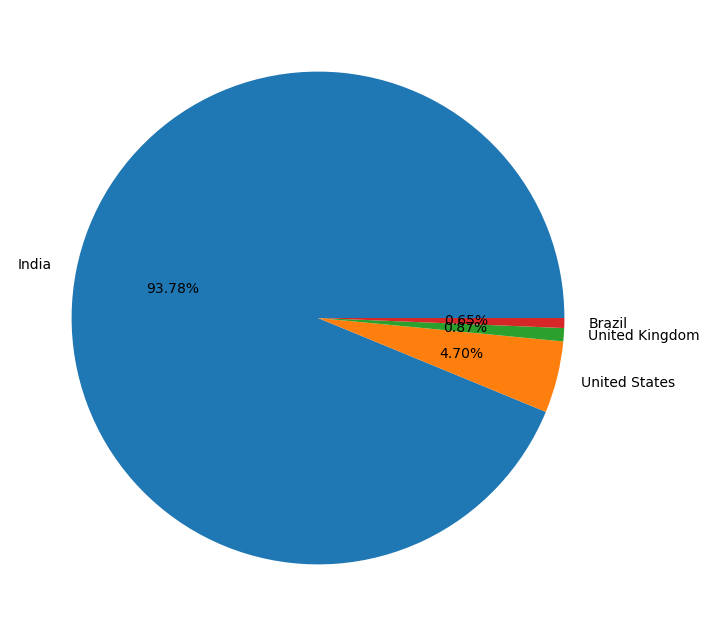

In [18]:
# only plot the piechart for top 4 countries
plt.subplots(figsize=(18, 8))
plt.pie(final_df['Country'].value_counts().values[: 4], labels=final_df['Country'].value_counts().index[: 4], autopct='%1.2f%%')

In [21]:
''' Observations: most of the records of this dataset 
are belong to India. 
'''

' Observations: most of the records of this dataset \nare belong to India. \n'

In [23]:
# now, draw some insights from ratings
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [29]:
# make a group of ratings and make some observations from the ratings
final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index()[: 5]

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


In [33]:
# now, create a dataframe and also change the column name of the last column
rating = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0: 'Rating count'})
rating.head(4)

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating count'>

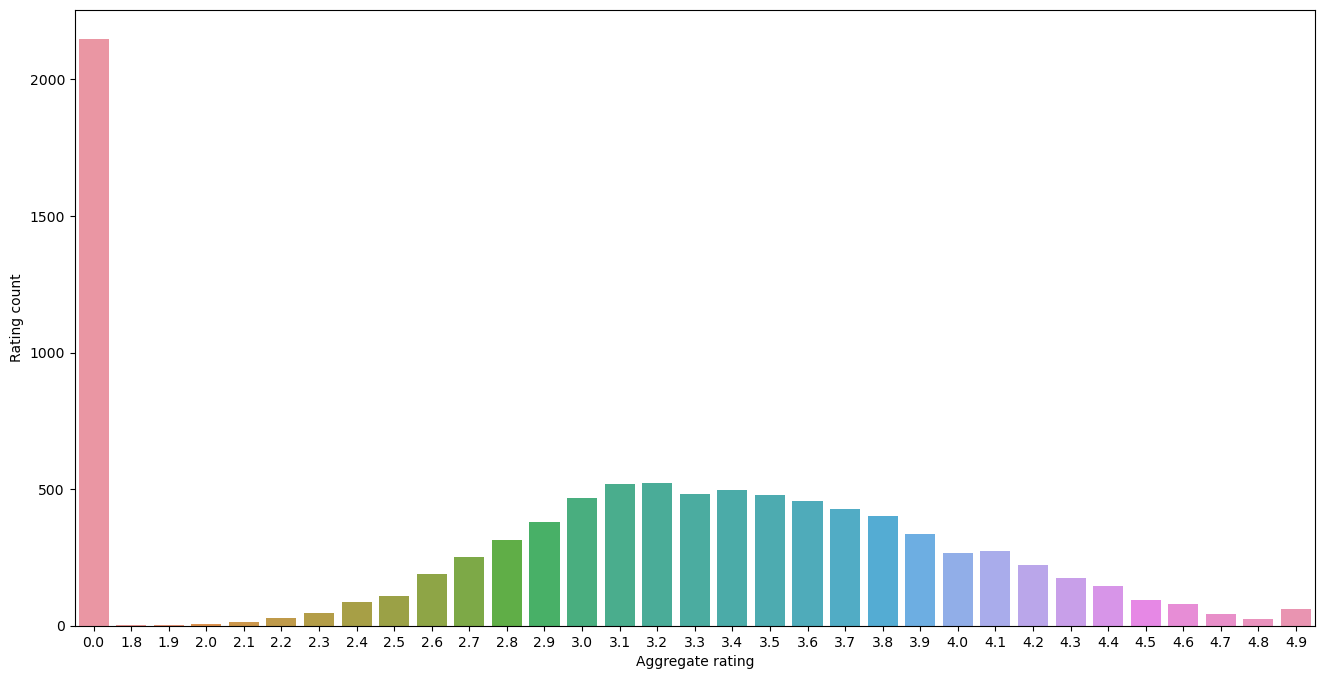

In [37]:
# now try to visulaize the data using relevent plotting
plt.rcParams['figure.figsize'] = (16, 8)
sns.barplot(x='Aggregate rating', y='Rating count', data=rating)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating count'>

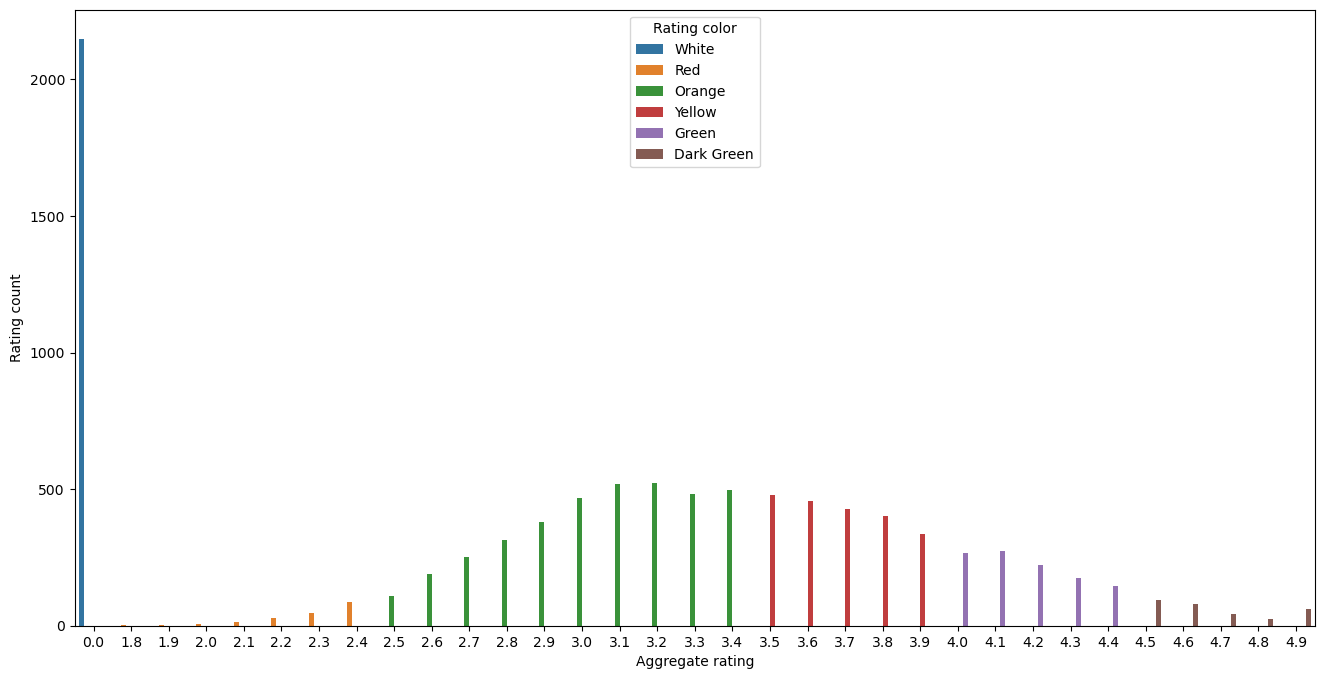

In [40]:
# implement the color column too
sns.barplot(x='Aggregate rating', y='Rating count', hue='Rating color', data=rating)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating count'>

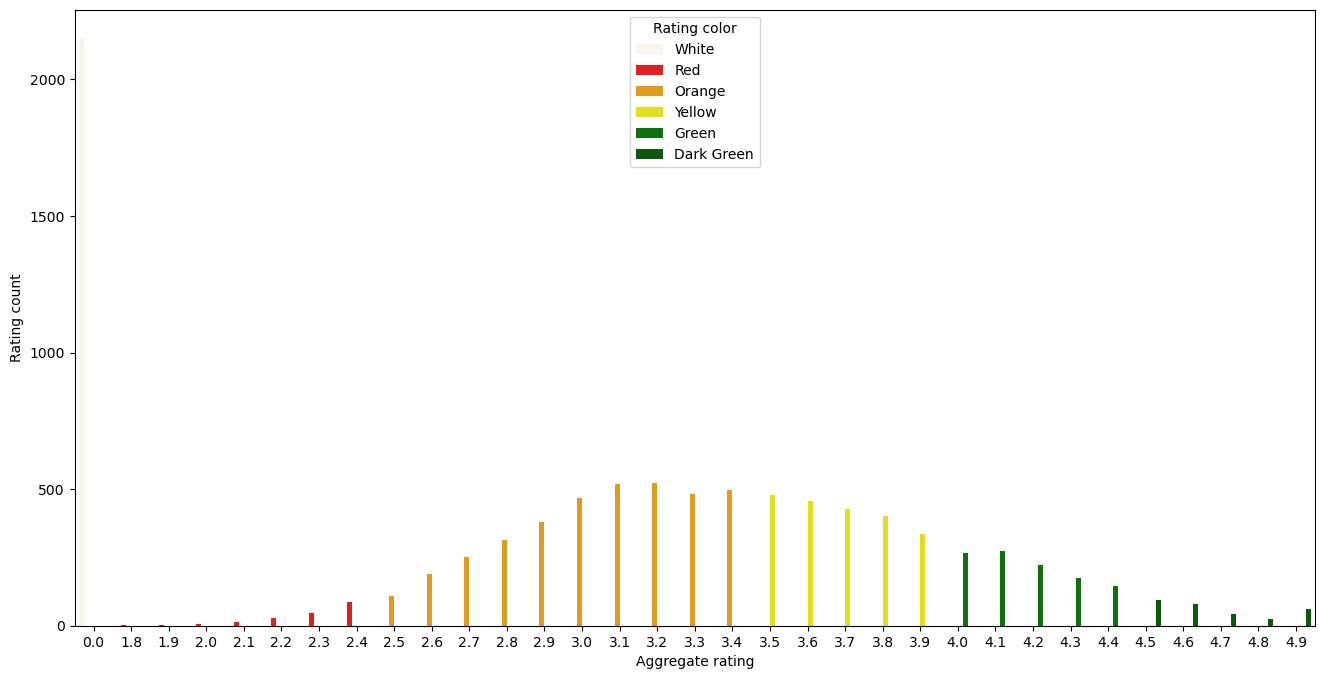

In [52]:
# color isn't mapped, map the color
sns.barplot(x='Aggregate rating', y='Rating count', hue='Rating color', data=rating, palette=['#F9F6EE', 'red', 'orange', 'yellow', 'green', 'darkgreen'])

In [53]:
''' Observations: counts are very high
and maximum number of ratings are from the 2.7 to 4.2
'''

' Observations: counts are very high\nand maximum number of ratings are from the 2.7 to 4.2\n'

In [54]:
## countplot isn't relevent 

### Q1. find the countries name that have given 0 rating.

In [56]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [66]:
not_rated_df = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text', 'Country']).size().reset_index().rename(columns={0: 'Rating count'})
not_rated_df.head(5)



,Aggregate rating,Rating color,Rating text,Country,Rating count
0,0.0,White,Not rated,Brazil,5
1,0.0,White,Not rated,India,2139
2,0.0,White,Not rated,United Kingdom,1
3,0.0,White,Not rated,United States,3
4,1.8,Red,Poor,India,1


In [79]:
not_rated_mask = not_rated_df['Aggregate rating'] <= 0
not_rated_df[not_rated_mask]

# or, not_rated_df[not_rated_df['Rating color'] == 'White']

,Aggregate rating,Rating color,Rating text,Country,Rating count
0,0.0,White,Not rated,Brazil,5
1,0.0,White,Not rated,India,2139
2,0.0,White,Not rated,United Kingdom,1
3,0.0,White,Not rated,United States,3


In [80]:
''' Observations: india has the highest number of people who doesn't rate.
'''

" Observations: india has the highest number of people who doesn't rate.\n"

### Q2. find out which currenncy is used by which country

In [83]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [98]:
curr_df = final_df.groupby(['Country', 'Currency']).size().reset_index().rename(columns={0: 'Records count'})
curr_df

,Country,Currency,Records count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


### Q2. Which countries has online delivery options

In [99]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [112]:
mask = (final_df['Has Online delivery'] == 'Yes')
final_df[mask]['Country'].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

### Q3. Create a piechart for cities distribution.

In [113]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [116]:
# find the record on the basis of city
final_df['City'].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

In [118]:
city_names = final_df['City'].value_counts().index
city_orders = final_df['City'].value_counts().values

([<matplotlib.patches.Wedge at 0x7faac014afa0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029922, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289048, '0.31%')])

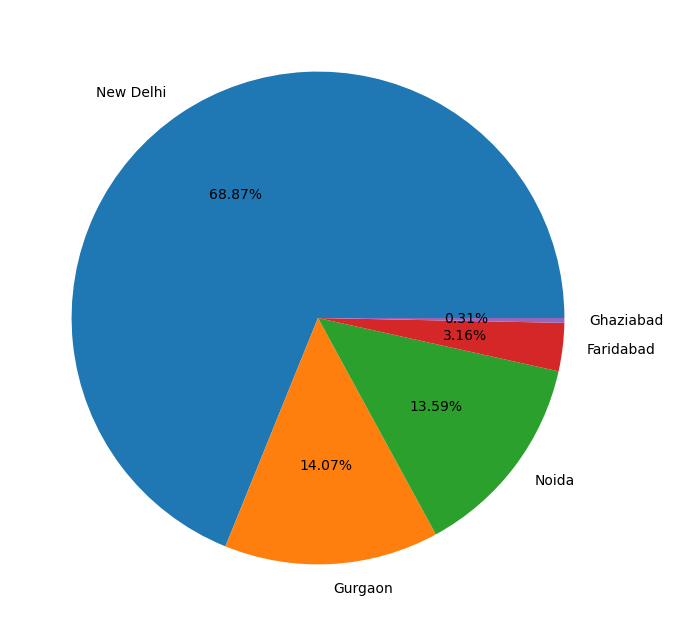

In [124]:
# now, plot the piechart for top 5 cities
plt.pie(x=city_orders[: 5], labels=city_names[: 5], autopct='%1.2f%%')

### Q4. Find the top cuisines of zomato

In [125]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [131]:
final_df['Cuisines'].value_counts()[: 5]

North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64

([<matplotlib.patches.Wedge at 0x7fab25d8f040>,
 [Text(0.4175823090707363, 1.0176566292965188, 'North Indian'),
  Text(-1.090169487983684, 0.1467327075651237, 'North Indian, Chinese'),
  Text(-0.6326704341218391, -0.8998489438722945, 'Chinese'),
  Text(0.3048764124205039, -1.0569060379946758, 'Fast Food'),
  Text(1.0036916287969155, -0.45011455684413826, 'North Indian, Mughlai')],
 [Text(0.22777216858403795, 0.5550854341617375, '37.61%'),
  Text(-0.5946379025365549, 0.08003602230824929, '20.53%'),
  Text(-0.3450929640664576, -0.49082669665761514, '14.22%'),
  Text(0.16629622495663846, -0.5764942025425503, '14.22%'),
  Text(0.5474681611619538, -0.24551703100589356, '13.42%')])

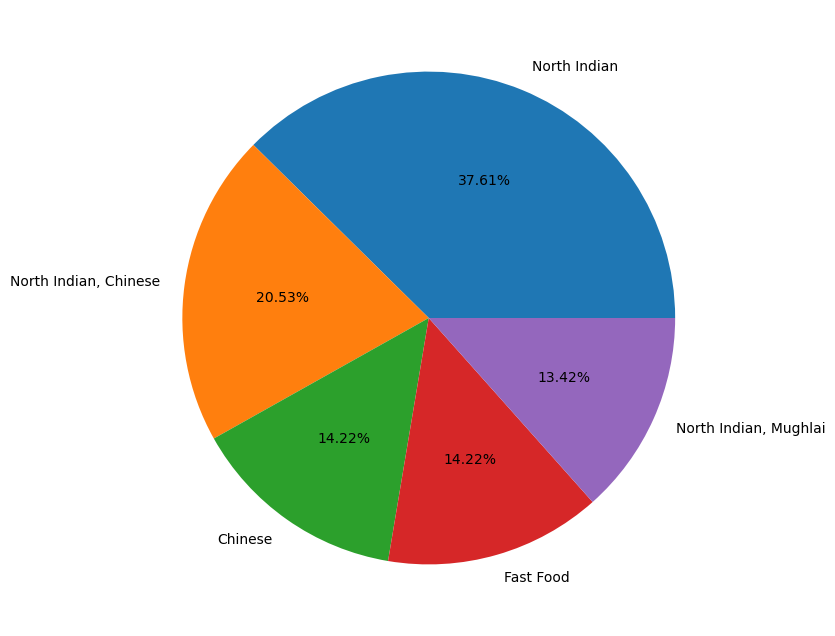

In [133]:
# plotting the piechart to understand the food orders
plt.pie(x=final_df['Cuisines'].value_counts().values[: 5], labels=final_df['Cuisines'].value_counts().index[: 5], autopct='%1.2f%%')

<AxesSubplot:>

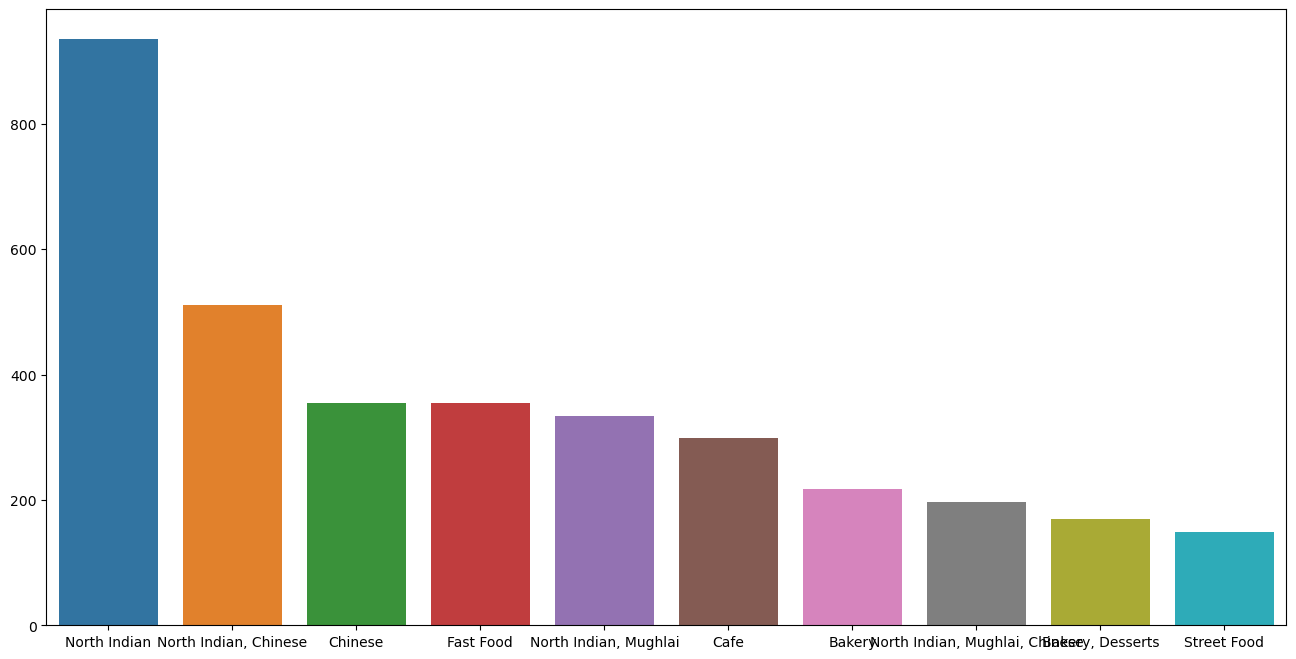

In [138]:
# trying to plot the barplot graph
sns.barplot(x=final_df['Cuisines'].value_counts().index[: 10], y=final_df['Cuisines'].value_counts().values[: 10])